In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gamma = 0.95
n = 1000
delt = 0.95
N = 3
NG = 52
x = []
y = []

for i in range(0,n):
    x.append(i + (np.random.uniform(0,1) * N) / NG)
    y.append(N * np.random.uniform(0,1) * x[i] + NG * np.random.uniform(0,1) + N)
    
x = np.array(x)
y = np.array(y)

In [3]:
b, a = np.polyfit(x, y, 1)
print(a, b)

5.70903594896226 1.5595729697535157


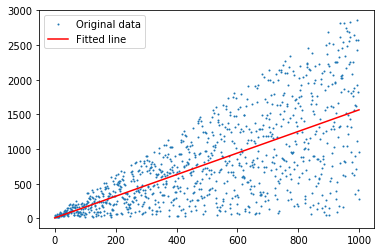

In [4]:
plt.plot(x, y, 'o', label='Original data', markersize=1)
plt.plot(x, a + b * x, 'r', label='Fitted line')
plt.legend()
plt.show()

In [5]:
y_cap = a + b * x
e = y - y_cap
sum1 = 0
s_2 = []

for i in range(0,n):
    sum1 += ((x[i] - x.mean()) ** 2)

for i in range(0,n):
    s_2.append((sum(e ** 2) / (n - 2)) * (1 - (1 / n) - ((x[i] - x.mean()) ** 2) / sum1))
       
s_2 = np.array(s_2)

In [6]:
R = max(abs(e / np.sqrt(s_2)))
R

2.8248652393340987

In [7]:
R_delta = 4
R > R_delta

False

Перевірка гіпотези про відповідність оцінок коефіцієнтів істинним значенням та адекватність моделі

In [8]:
#H0: beta = b
t = 1.645 #???

s_2_x = 0
for i in range(0,n):
    s_2_x += (x[i] - x.mean()) ** 2
s_2_x /= n - 1

s_x = np.sqrt(s_2_x)

s_2 = 0
for i in range(0,n):
    s_2 += (y[i] - a - b * x[i]) ** 2
s_2 /= n - 2

s = np.sqrt(s_2)

s_beta = s / (s_x * np.sqrt(n - 1))

if abs(b) > t * s_beta:
    print("Значення коефіцієнта b є значимим з достовірністю δ")
else: print("Значення коефіцієнта b не є значимим з достовірністю δ")


Значення коефіцієнта b є значимим з достовірністю δ


In [9]:
#H0: alpha = a
s_alpha = s * np.sqrt((1 / n) + (x.mean() ** 2) / ((n - 1) * s_2_x))

if abs(a) > t * s_alpha:
    print("Значення коефіцієнта a є значимим з достовірністю δ")
else: print("Значення коефіцієнта a не є значимим з достовірністю δ")

Значення коефіцієнта a не є значимим з достовірністю δ


In [10]:
F_delta = 1.03 #???

s_2_y = 0
for i in range(0,n):
    s_2_y += (y[i] - y.mean()) ** 2
s_2_y /= n - 1

if s_2 / s_2_y < F_delta:
    print("Модель адекватна з достовірністю δ")

Модель адекватна з достовірністю δ


0.00027420906393231797 1.2856233461268223 51.28103407184785


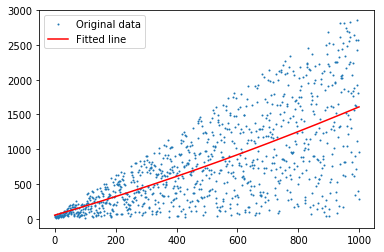

In [11]:
a1, b1, c1 = np.polyfit(x, y, 2)
print(a1, b1, c1)
plt.plot(x, y, 'o', label='Original data', markersize=1)
plt.plot(x, a1 * x ** 2 + b1 * x + c1, 'r', label='Fitted line')
plt.legend()
plt.show()

In [12]:
s_2_poly = 0
for i in range(0,n):
    s_2_poly += (y[i] - c1 - b1 * x[i] - a1 * x[i] * x[i]) ** 2
s_2_poly /= n - 2

In [13]:
s_2

235308.9742467373

In [14]:
s_2_poly

234890.42277284447

1.2062805557196748e-06 -0.0015335039103573122 2.007686919651075 -8.69271715214466


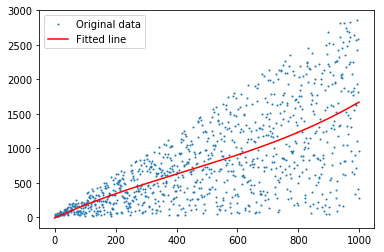

In [22]:
a1, b1, c1, d1 = np.polyfit(x, y, 3)
print(a1, b1, c1, d1)
plt.plot(x, y, 'o', label='Original data', markersize=1)
plt.plot(x, a1 * x ** 3 + b1 * x ** 2 + c1 * x + d1, 'r', label='Fitted line')
plt.legend()
plt.show()
s_2_poly_cub = 0
for i in range(0,n):
    s_2_poly_cub += (y[i] - d1 - c1 * x[i] - b1 * x[i] ** 2 - a1 * x[i] ** 3) ** 2
s_2_poly_cub /= n - 2

In [16]:
s_2_poly_cub

234369.7238088082

In [20]:
s_2_poly - s_2_poly_cub

520.6989640362735

In [21]:
s_2 - s_2_poly

418.55147389284684